# Contents

1. Data Cleaning  
    1.1 [Crime](#Crime_Data_Cleaning)  
    1.2 [Weather](#Weather_Data_Cleaning)  
2. EDA  
    2.1 [Crime](#Crime_EDA)

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Load In Annual NYPD Complaint Data

In [2]:
# load in the raw data for NYPD complaints
df_2014 = pd.read_csv('./data/NYPD_Crime/NYPD_Complaint_Data_2014.csv')
df_2015 = pd.read_csv('./data/NYPD_Crime/NYPD_Complaint_Data_2015.csv')
df_2016 = pd.read_csv('./data/NYPD_Crime/NYPD_Complaint_Data_2016.csv')
df_2017 = pd.read_csv('./data/NYPD_Crime/NYPD_Complaint_Data_2017.csv')

/Users/kevinc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Load In NOAA Central Park Weather Data

In [3]:
# load the weather date from NOAA
weather = pd.read_csv('data/NOAA_weather_data.csv')

# Data_Cleaning

## Crime_Data_Cleaning

### Combine Crime Data Into One Dataframe

In [4]:
# combine all four years
df_raw = pd.concat([df_2014, df_2015, df_2016, df_2017])

# delete the individual dataframes
del df_2014
del df_2015
del df_2016
del df_2017

### Check Dataframe Shape, Object Types, Summary Stats, Missingness

In [5]:
df_raw.shape

(1904471, 35)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904471 entries, 0 to 458222
Data columns (total 35 columns):
CMPLNT_NUM           int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
ADDR_PCT_CD          float64
RPT_DT               object
KY_CD                int64
OFNS_DESC            object
PD_CD                float64
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
BORO_NM              object
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
JURIS_DESC           object
JURISDICTION_CODE    float64
PARKS_NM             object
HADEVELOPT           object
HOUSING_PSA          float64
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP       object
SUSP_RACE            object
SUSP_SEX             object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon              object
PATROL_BORO          object
STATION_NAME 

In [7]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
CMPLNT_NUM,1904471.0,5.498144e+08,2.598973e+08,1.000003e+08,3.248178e+08,5.495421e+08,7.750032e+08,9.999998e+08
ADDR_PCT_CD,1904470.0,6.336988e+01,3.437610e+01,1.000000e+00,4.000000e+01,6.300000e+01,9.400000e+01,1.230000e+02
KY_CD,1904471.0,2.983755e+02,1.518381e+02,1.010000e+02,1.170000e+02,3.410000e+02,3.510000e+02,8.810000e+02
PD_CD,1903199.0,4.098843e+02,2.193960e+02,1.010000e+02,2.540000e+02,3.570000e+02,6.370000e+02,9.750000e+02
JURISDICTION_CODE,1903199.0,7.477494e-01,6.808418e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e+01
HOUSING_PSA,149734.0,6.983996e+03,1.447530e+04,2.180000e+02,4.830000e+02,6.960000e+02,1.251000e+03,7.067900e+04
X_COORD_CD,1904373.0,1.005024e+06,2.146533e+04,9.133570e+05,9.919130e+05,1.004574e+06,1.016773e+06,1.067226e+06
Y_COORD_CD,1904373.0,2.072033e+05,3.046447e+04,1.211310e+05,1.842580e+05,2.062480e+05,2.352080e+05,2.718200e+05
TRANSIT_DISTRICT,46115.0,1.307629e+01,1.216575e+01,1.000000e+00,3.000000e+00,1.100000e+01,2.300000e+01,3.400000e+01
Latitude,1904373.0,4.073536e+01,8.362118e-02,4.049891e+01,4.067236e+01,4.073275e+01,4.081227e+01,4.091272e+01


In [8]:
pd.DataFrame(df_raw.isnull().sum()).sort_values(0, ascending=False)

,0
PARKS_NM,1887537
STATION_NAME,1858356
TRANSIT_DISTRICT,1858356
HADEVELOPT,1808272
HOUSING_PSA,1754737
SUSP_AGE_GROUP,894373
SUSP_RACE,643199
SUSP_SEX,643199
LOC_OF_OCCUR_DESC,387897
CMPLNT_TO_DT,341631


### Convert Column Names, Select Columns to Use

In [9]:
# convert column names to lowercase
df_raw.columns = df_raw.columns.str.lower()

# give relevant columns more intuitive names
df_raw.rename(columns={'cmplnt_fr_dt': 'complaint_date', 'addr_pct_cd': 'precinct', 
                'ofns_desc': 'crime', 'juris_desc': 'jurisdiction'}, inplace=True)

# narrow the dataframe down to just the columns I am working with
df = df_raw[['complaint_date', 'precinct', 'crime', 'latitude', 'longitude']]
df.head()

,complaint_date,precinct,crime,latitude,longitude
0,12/31/2014,14.0,ROBBERY,40.756642,-73.988372
1,12/31/2014,100.0,PETIT LARCENY,40.587514,-73.811705
2,12/31/2014,121.0,DANGEROUS DRUGS,40.631165,-74.146914
3,12/31/2014,81.0,PETIT LARCENY,40.689648,-73.924054
4,12/31/2014,72.0,HARRASSMENT 2,40.652091,-74.008290


### Convert Date to Correct Datatype, Set as Index

In [10]:
# convert complaint_from_date to datetime datatype
df['complaint_date'] = pd.to_datetime(df.complaint_date)

# set the index to the complaint date
df.set_index('complaint_date', inplace=True)

# sort the index
df.sort_index(inplace=True)

# check results
df.head()

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,precinct,crime,latitude,longitude
complaint_date,,,,
2014-01-01,121.0,CRIMINAL MISCHIEF & RELATED OF,40.624655,-74.148881
2014-01-01,46.0,CRIMINAL MISCHIEF & RELATED OF,40.849963,-73.902241
2014-01-01,34.0,OFFENSES AGAINST PUBLIC ADMINI,40.858133,-73.931363
2014-01-01,10.0,CRIMINAL TRESPASS,40.749855,-74.001416
2014-01-01,114.0,ASSAULT 3 & RELATED OFFENSES,40.773916,-73.913423


### Create Time Columns to Facilitate Batching

In [11]:
# add columns corresponding to date (easier to operate on than datetimeindex), 
# day of the month, month, year, and day of the week
df['date'] = df.index
df['day_of_month'] = df.date.dt.day
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['day_of_week'] = df.date.dt.dayofweek

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [12]:
df.tail()

,precinct,crime,latitude,longitude,date,day_of_month,month,year,day_of_week
complaint_date,,,,,,,,,
2017-12-31,47.0,PETIT LARCENY,40.885452,-73.840755,2017-12-31,31,12,2017,6
2017-12-31,25.0,MISCELLANEOUS PENAL LAW,40.796214,-73.933789,2017-12-31,31,12,2017,6
2017-12-31,113.0,OFF. AGNST PUB ORD SENSBLTY &,40.674504,-73.791978,2017-12-31,31,12,2017,6
2017-12-31,14.0,BURGLARY,40.747730,-73.986839,2017-12-31,31,12,2017,6
2017-12-31,114.0,ROBBERY,40.759170,-73.919401,2017-12-31,31,12,2017,6


### Drop Remaining Nulls

In [13]:
df.isnull().sum()

precinct           1
crime           2733
latitude          98
longitude         98
date               0
day_of_month       0
month              0
year               0
day_of_week        0
dtype: int64

In [14]:
df.dropna(inplace=True)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Save Cleaned Crime Dataframe to CSV

In [15]:
df.to_csv('./data/crime_2014_2017.csv')

## Weather_Data_Cleaning

In [16]:
# look at the first few rows
weather.head(2)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-01,0.05,",,X,2400",0.0,",,X,",...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2012-01-02,0.00,",,X,2400",0.0,",,X,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# narrow down the dataframe to the columns I'm working with
central_park = weather[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']]
central_park.head(2)

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
0,2012-01-01,0.05,0.0,0.0,52,41
1,2012-01-02,0.00,0.0,0.0,50,33


In [18]:
# rename the columns so they're easier more intuitive to work with
central_park.rename(columns={'DATE':'date', 
                             'PRCP':'precipitation', 
                             'SNOW':'snow_fall', 
                             'SNWD':'snow_accum', 
                             'TMAX':'max_temp', 
                             'TMIN':'min_temp'},
                    inplace=True)
central_park.head(2)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,date,precipitation,snow_fall,snow_accum,max_temp,min_temp
0,2012-01-01,0.05,0.0,0.0,52,41
1,2012-01-02,0.00,0.0,0.0,50,33


In [19]:
# check nulls 
central_park.isnull().sum()

date             0
precipitation    0
snow_fall        0
snow_accum       0
max_temp         0
min_temp         0
dtype: int64

In [20]:
# check data types
central_park.dtypes

date              object
precipitation    float64
snow_fall        float64
snow_accum       float64
max_temp           int64
min_temp           int64
dtype: object

In [21]:
# set date to datetime dtype
central_park['date'] = pd.to_datetime(central_park.date)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# make sure the dataframe is in chronological order
# by sorting by date and resetting the index
central_park.sort_values('date', inplace=True)
central_park.reset_index(inplace=True)
print(min(central_park.date))
print(max(central_park.date))

2012-01-01 00:00:00
2019-04-22 00:00:00


/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# save cleaned dataframe to csv
central_park.to_csv('data/central_park_temp_precip.csv')

# EDA

## Crime_EDA

### Annual Total

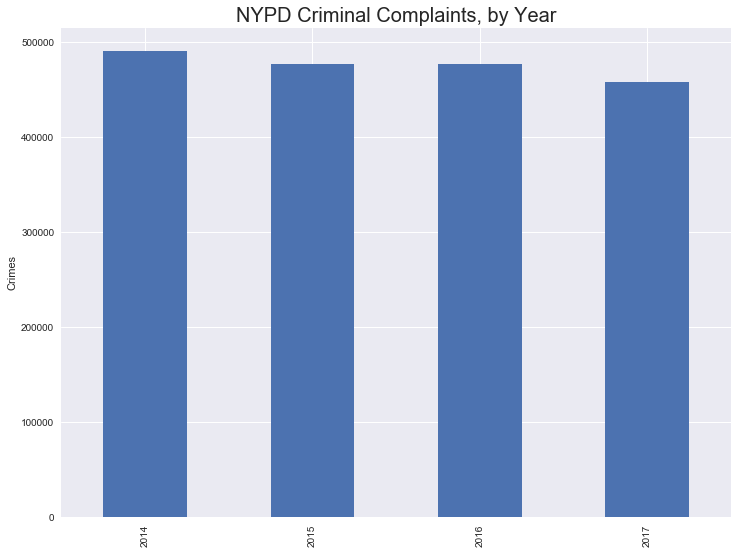

In [24]:
# plot annual crimes
plt.figure(figsize=(12,9))
df.groupby([df.index.year]).size().plot(kind='bar')
plt.ylabel('Crimes')
plt.xlabel('')
plt.title('NYPD Criminal Complaints, by Year', fontsize=20);

### Aggregate Monthly Totals

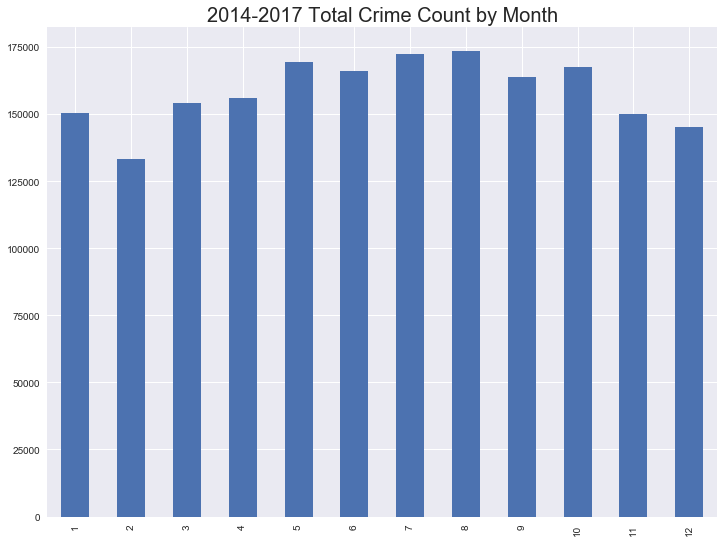

In [25]:
# plot aggregate crime by month
plt.figure(figsize=(12,9))
df.month.value_counts(sort=False).plot(kind='bar')
plt.title('2014-2017 Total Crime Count by Month', fontsize=20);

There appears to be an increase in criminal complaints during summer months.

### Monthly Totals

Text(0.5, 1.0, 'Monthly Crime Incidents, 2014-2017')

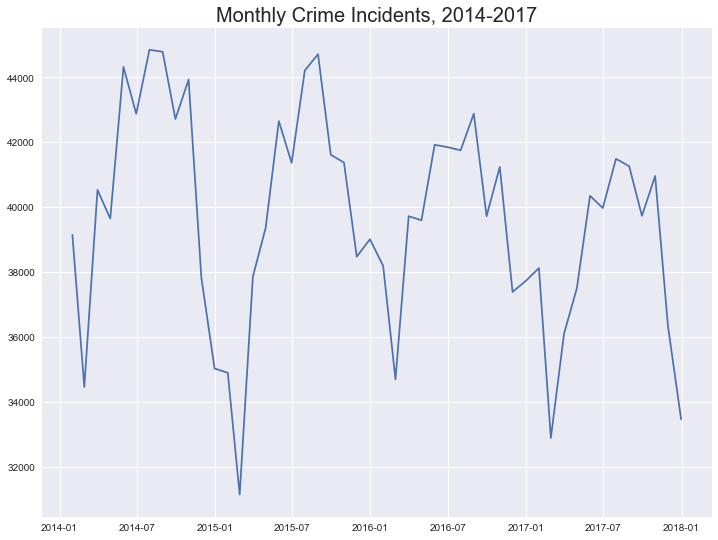

In [26]:
# plot monthly crimes
plt.figure(figsize=(12,9))
plt.plot(df.resample('M').size())
plt.title('Monthly Crime Incidents, 2014-2017', fontsize=20)

Crime rates are definitely higher during summer months. Let's check if this is statistically significant.

## Perform a T-test to Check Statistical Significance

First, I have to create a seasons column so that I can batch crime by season.

In [27]:
# add a column corresponding to the season
# assume three-month intervals where winter is Dec-Jan-Feb, etc.
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(enumerate(seasons, 1))
df['season'] = df.date.dt.month.map(month_to_season)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Next, I batch the crimes into summer and non-summer months.

In [28]:
# batch summer month crime counts
summer_count = df[df.season == 3].groupby('date').count()
summer = summer_count['precinct']

# # check the batch
# print('# values:', len(summer))
# summer.head()

In [29]:
# batch non-summer months
non_summer_count = df[df.season != 3].groupby('date').count()
non_summer= non_summer_count['precinct']

# # check the batch
# print('# values:', len(non_summer))
# non_summer.head()

Before performing the T-test, I want to confirm that both samples are normally distributed 

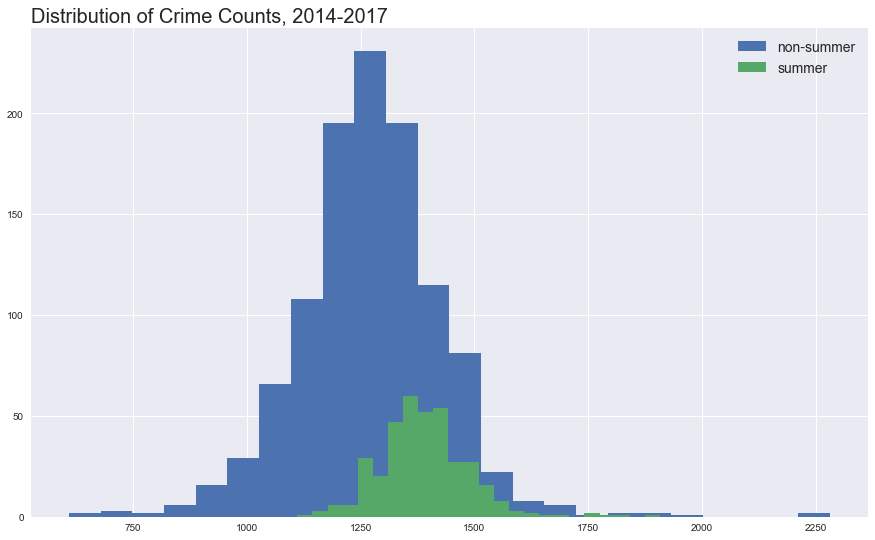

In [30]:
# plot the distributions of crime counts for both batches
# to check that the assumption of normal distribution is met
plt.figure(figsize=(15,9))
plt.hist(non_summer, label='non-summer', bins=24)
plt.hist(summer, label='summer', bins=24)
plt.title('Distribution of Crime Counts, 2014-2017', fontsize=20, loc='left')
plt.legend(fontsize=14);

Both distributions are roughly normal, so we can go ahead with the T-test.

In [31]:
# import scipy stats
from scipy import stats
# perform the t-test
stats.ttest_ind(summer, non_summer)

Ttest_indResult(statistic=13.477371946081822, pvalue=4.184135915484568e-39)

The p value is extremely small, so we can reject the null hypothesis and move on with the assumption that crime incidence during the summer is significantly different from crime incidence during the rest of the year.

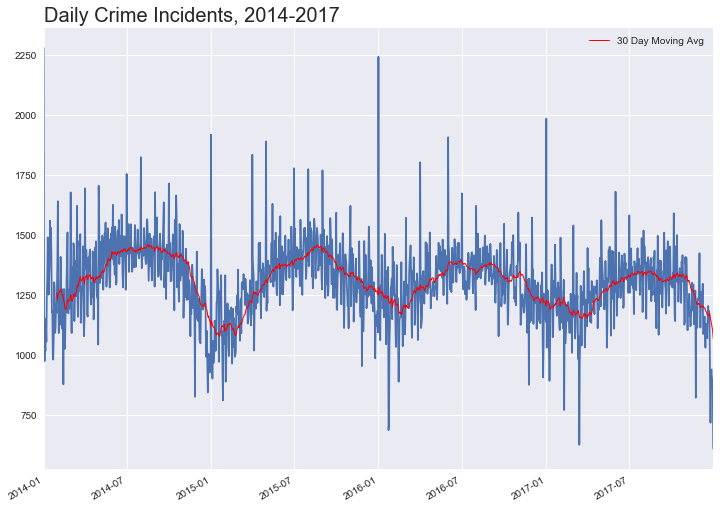

In [32]:
# plot daily crimes
plt.figure(figsize=(12,9))
df.index.value_counts(sort=False).plot(label='')
plt.plot(df.resample('D').size().rolling(30).mean(), label='30 Day Moving Avg', linewidth=1, c='r')
plt.title('Daily Crime Incidents, 2014-2017', fontsize=20, loc='left')
plt.legend();

 There are also notable spikes the first of every year.

In [33]:
# look at top crime dates
top_20_crime_dates = pd.DataFrame(df.index.value_counts()[:20])
top_20_crime_dates.columns = top_20_crime_dates.columns.map({'complaint_date':'complaint_count'})
top_20_crime_dates

,complaint_count
2014-01-01,2281
2016-01-01,2244
2017-01-01,1986
2015-01-01,1919
2016-06-01,1908
2015-05-01,1891
2015-04-01,1835
2014-08-01,1825
2016-04-01,1804
2015-07-01,1779


Actually, top crime dates occur on the first of the month. I'll take a closer look at that.

### Bar Graph of Totals by Day of Month

average crime by day of month:  61343.22580645161


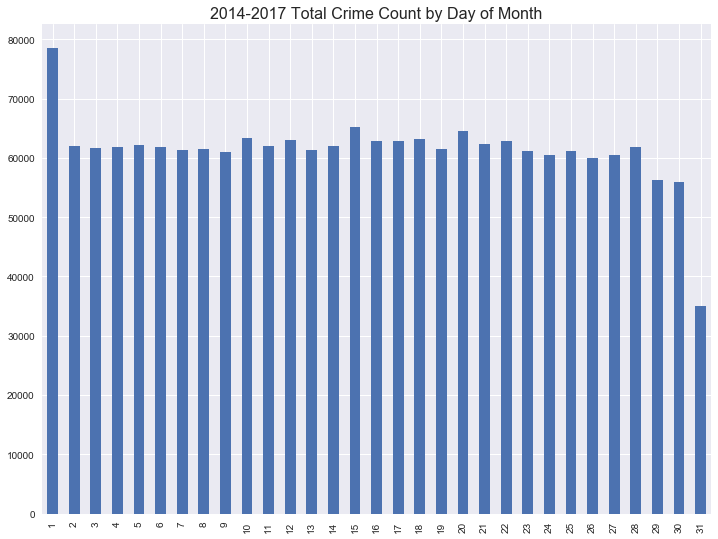

In [34]:
# plot crime by day of month
print('average crime by day of month: ', np.mean(df.day_of_month.value_counts()))
plt.figure(figsize=(12,9))
df.day_of_month.value_counts(sort=False).plot(kind='bar')
plt.title('2014-2017 Total Crime Count by Day of Month', fontsize=16);

The total for the first of the month seems abnormally high. This ould be a data entry issue or a policy effect (quotas inflating amount, or numbers-hacking pushing crimes off to the following month, or something else).

The last few days of the month looks strange, but it's importand to keep in mind that only seven months have a 31st day; the count is actually in line with the average. Also February usually has only 28 days, so the decrease for the 29th and 30th counts are also expected, at least when considering these numbers at a high level.

Would be interesting to see whether specific crimes have higher-than-expected occurrence on the first of the month. Does it hold up across all precincts or is it specific to a few?

Also worth considering models where the first of the months are removed (or imputed to more reasonable values).

Looking again at the daily chart, the spikes on the first of the month are striking. 

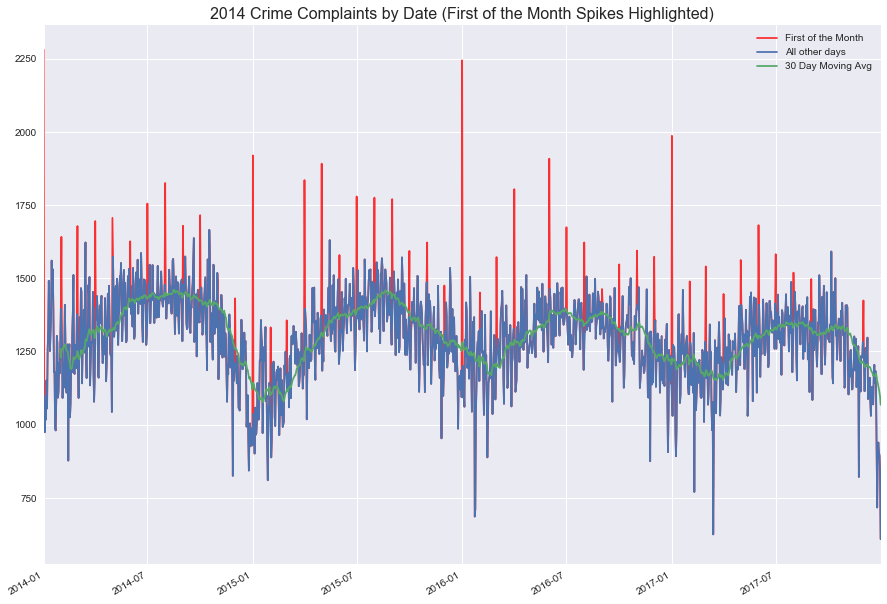

In [35]:
# plot first day of the month against all other days
plt.figure(figsize=(15,11))
df.date.value_counts(sort=False).plot(c='r', alpha=0.8, label='First of the Month')
df[df.day_of_month != 1].date.value_counts(sort=False).plot(label='All other days')
plt.plot(df.resample('D').size().rolling(30).mean(), label='30 Day Moving Avg')
plt.title('2014 Crime Complaints by Date (First of the Month Spikes Highlighted)', fontsize=16)
plt.legend();

### Plot Anomalies Based on 95% Confidence Bands

In [100]:
# adapted from https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3

from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, 
                      window,  
                      scale=1.96):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window).mean()
    plt.figure(figsize=(15,9))
    plt.title("{} Day Moving Average Anomalies".format(window), fontsize=24, loc='left')
    plt.plot(rolling_mean, "r", label="Rolling Avg")

    # Plot confidence intervals for smoothed values
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    std = np.std(series[window:] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + scale * std) # 1.96 times std gives 95% confidence intervals
    upper_bound = rolling_mean + (mae + scale * std)
    plt.plot(upper_bound, "r--", label="95% Confidence Interval")
    plt.plot(lower_bound, "r--")
        
    # Having the intervals, plot abnormal values
    anomalies= series[(series<lower_bound) | (series>upper_bound)]
    plt.plot(anomalies, "ro", markersize=10, label='Anomaly')

    plt.plot(series, label="Actual values")
    plt.legend(loc="upper right")
    plt.grid(True);

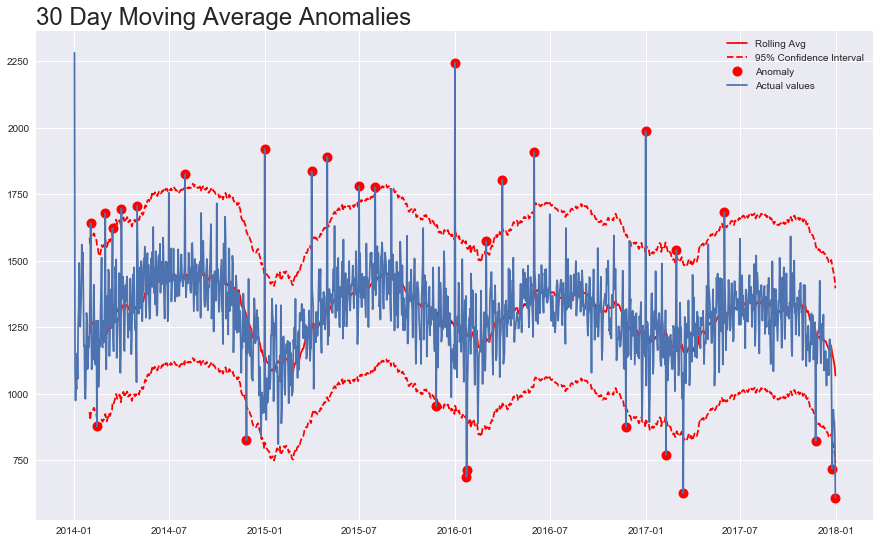

In [101]:
plotMovingAverage(pd.DataFrame(complaints.resample('D').size()), 30)

### Extract List of Anomalies For Possible Removal

In [88]:
# adapted from https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3

from sklearn.metrics import mean_absolute_error, mean_squared_error
def returnAnomalies(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + scale * deviation) # 1.96 times std gives 95% confidence intervals
    upper_bound = rolling_mean + (mae + scale * deviation)
    anomalies= series[(series<lower_bound) | (series>upper_bound)]
    anomalies = anomalies.notnull()
    anomalies.columns = anomalies.columns.astype(str)
    return anomalies[anomalies['0']==True]

In [89]:
anom_list = returnAnomalies(pd.DataFrame(complaints.resample('D').size()), 30)

In [90]:
anom_list.index

DatetimeIndex(['2014-02-01', '2014-02-13', '2014-03-01', '2014-03-15',
               '2014-04-01', '2014-05-01', '2014-08-01', '2014-11-27',
               '2015-01-01', '2015-04-01', '2015-05-01', '2015-07-01',
               '2015-08-01', '2015-11-26', '2016-01-01', '2016-01-23',
               '2016-01-24', '2016-03-01', '2016-04-01', '2016-06-01',
               '2016-11-24', '2017-01-01', '2017-02-09', '2017-03-01',
               '2017-03-14', '2017-06-01', '2017-11-23', '2017-12-25',
               '2017-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [36]:
# check what percentage of crimes occurring on the first of the month occur in the top 10 precincts
first_day = df[df.index.day == 1]
first_day_percentage = pd.DataFrame(first_day.precinct.value_counts(normalize=True))
first_day_percentage.columns = ['day_one_percentage']
first_day_percentage['overall_percentage'] = df.precinct.value_counts(normalize=True)
first_day_percentage['difference'] = (first_day_percentage.day_one_percentage - first_day_percentage.overall_percentage) * 100
first_day_percentage.sort_values('difference', ascending=False).head(10)

,day_one_percentage,overall_percentage,difference
104.0,0.018803,0.013041,0.576250
62.0,0.016933,0.011853,0.508027
61.0,0.016335,0.011644,0.469109
25.0,0.017849,0.014525,0.332436
34.0,0.013447,0.011530,0.191780
121.0,0.015559,0.013876,0.168276
67.0,0.022200,0.020633,0.156693
105.0,0.016564,0.015009,0.155510
83.0,0.014987,0.013475,0.151202
108.0,0.011501,0.010061,0.144004


23.25 percent of all crimes are reported by the top ten precincts.  
22.4 percent of first day crimes are reported by the top ten precincts.   
The top ten precincts do not report crimes on the first of the month more frequently than expected.

In [37]:
# precinct_crime_percentage = pd.DataFrame(df.precinct.value_counts(normalize=True))
# precinct_crime_percentage['day1'] = first_day.precinct.value_counts(normalize=True).values
# plt.figure(figsize=(15,9))
# plt.bar(precinct_crime_percentage.index, precinct_crime_percentage.precinct)
# plt.bar(precinct_crime_percentage.index, precinct_crime_percentage.day1)

In [38]:
# plt.figure(figsize=(15,9))
# plt.bar(df.precinct.value_counts(normalize=True).index, 
#         df.precinct.value_counts(normalize=True).values,
#         align='edge')
# plt.bar(first_day.precinct.value_counts(normalize=True).index, 
#         first_day.precinct.value_counts(normalize=True).values, 
#         align='center',
#         color = 'r',
#         alpha=0.5)

In [39]:
# check what percentage of crimes occurring on the first of the month are top ten crimes
print('total year top 10 crime percentage: ', df.crime.value_counts()[:10].sum() / df.crime.value_counts().sum() * 100)
print('first of month top 10 crime percentage: ', first_day.crime.value_counts()[:10].sum() / first_day.crime.value_counts().sum() * 100)

total year top 10 crime percentage:  81.22063061357565
first of month top 10 crime percentage:  80.77554291820923


~81 percent of all crimes for the year were top ten crimes.  
~81 percent of crimes reported on the first of any month were top ten crimes.  
The top ten crimes are not reported on the first of the month more frequently than expected.

In [42]:
df['day_of_week'] = df.date.dt.dayofweek.map({0:'Mon', 
                                                1:'Tue', 
                                                2:'Wed', 
                                                3:'Thu', 
                                                4:'Fri', 
                                                5:'Sat', 
                                                6:'Sun'})

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


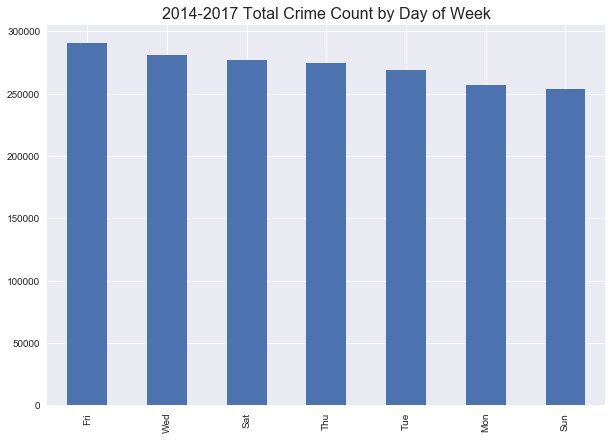

In [43]:
plt.figure(figsize=(10,7))
df.day_of_week.value_counts().plot(kind='bar')
plt.title('2014-2017 Total Crime Count by Day of Week', fontsize=16);

Highest crime days of the week are Friday, Wednesday, Saturday.

1804972 crimes in the top 10 precincts
94.92 percent of all crimes in all precincts


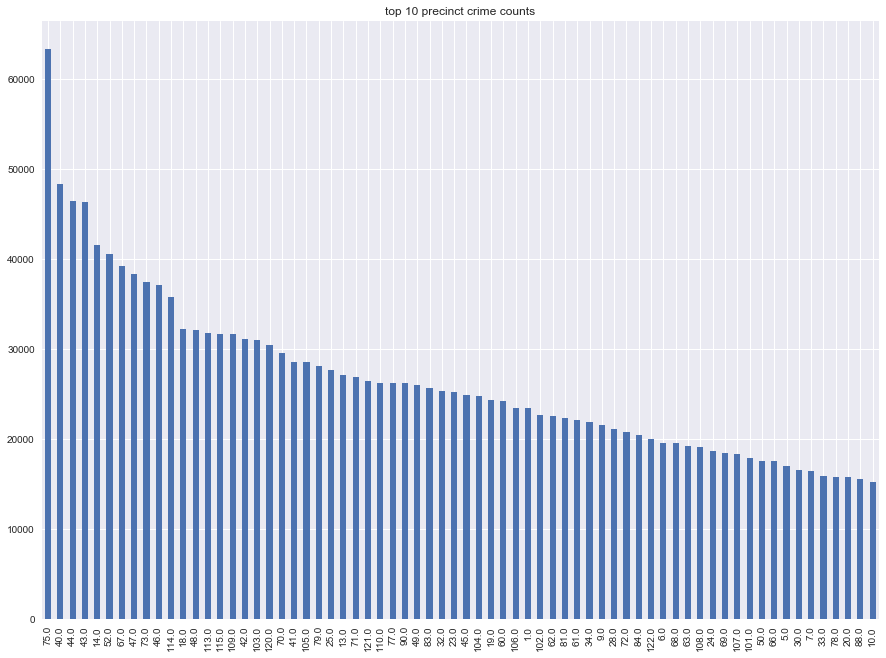

In [44]:
# top 10 precincts by count
print(sum(df.precinct.value_counts()[:10]),  'crimes in the top 10 precincts')
print(round(sum(df.precinct.value_counts(normalize=True)[:10])*100, 2), 'percent of all crimes in all precincts')

plt.figure(figsize=(15,11))
df.precinct.value_counts()[:10].plot(kind='bar')
plt.title('top 10 precinct crime counts');

In [45]:
# group by precinct and date
temp = df.groupby(['precinct','date']).count()
precinct_date_count = pd.DataFrame(temp.crime.unstack())
precinct_date_count.head()

date,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,2014-01-08 00:00:00,2014-01-09 00:00:00,2014-01-10 00:00:00,...,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
precinct,,,,,,,,,,,,,,,,,,,,,
1.0,21.0,20.0,14.0,10.0,7.0,18.0,13.0,13.0,15.0,10.0,...,14.0,11.0,6.0,9.0,16.0,13.0,12.0,13.0,10.0,6.0
5.0,12.0,8.0,11.0,6.0,17.0,7.0,9.0,12.0,8.0,9.0,...,9.0,11.0,8.0,3.0,8.0,9.0,11.0,9.0,6.0,3.0
6.0,30.0,12.0,9.0,8.0,10.0,9.0,5.0,15.0,12.0,19.0,...,14.0,12.0,7.0,3.0,8.0,18.0,13.0,10.0,11.0,7.0
7.0,26.0,8.0,7.0,3.0,10.0,7.0,5.0,9.0,11.0,12.0,...,11.0,14.0,7.0,7.0,8.0,6.0,4.0,3.0,13.0,6.0
9.0,36.0,6.0,9.0,11.0,13.0,6.0,15.0,11.0,16.0,23.0,...,11.0,11.0,4.0,1.0,6.0,8.0,10.0,11.0,15.0,11.0


In [46]:
#precinct_date_count.loc[75].sort_values(ascending=False)

In [47]:
def subplot_precincts(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,30))  
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].plot(dataframe.loc[column].rolling(30).mean())
        ax[i].set_title(f'90 Day Rolling Average of Crime in Precinct {int(column)}')

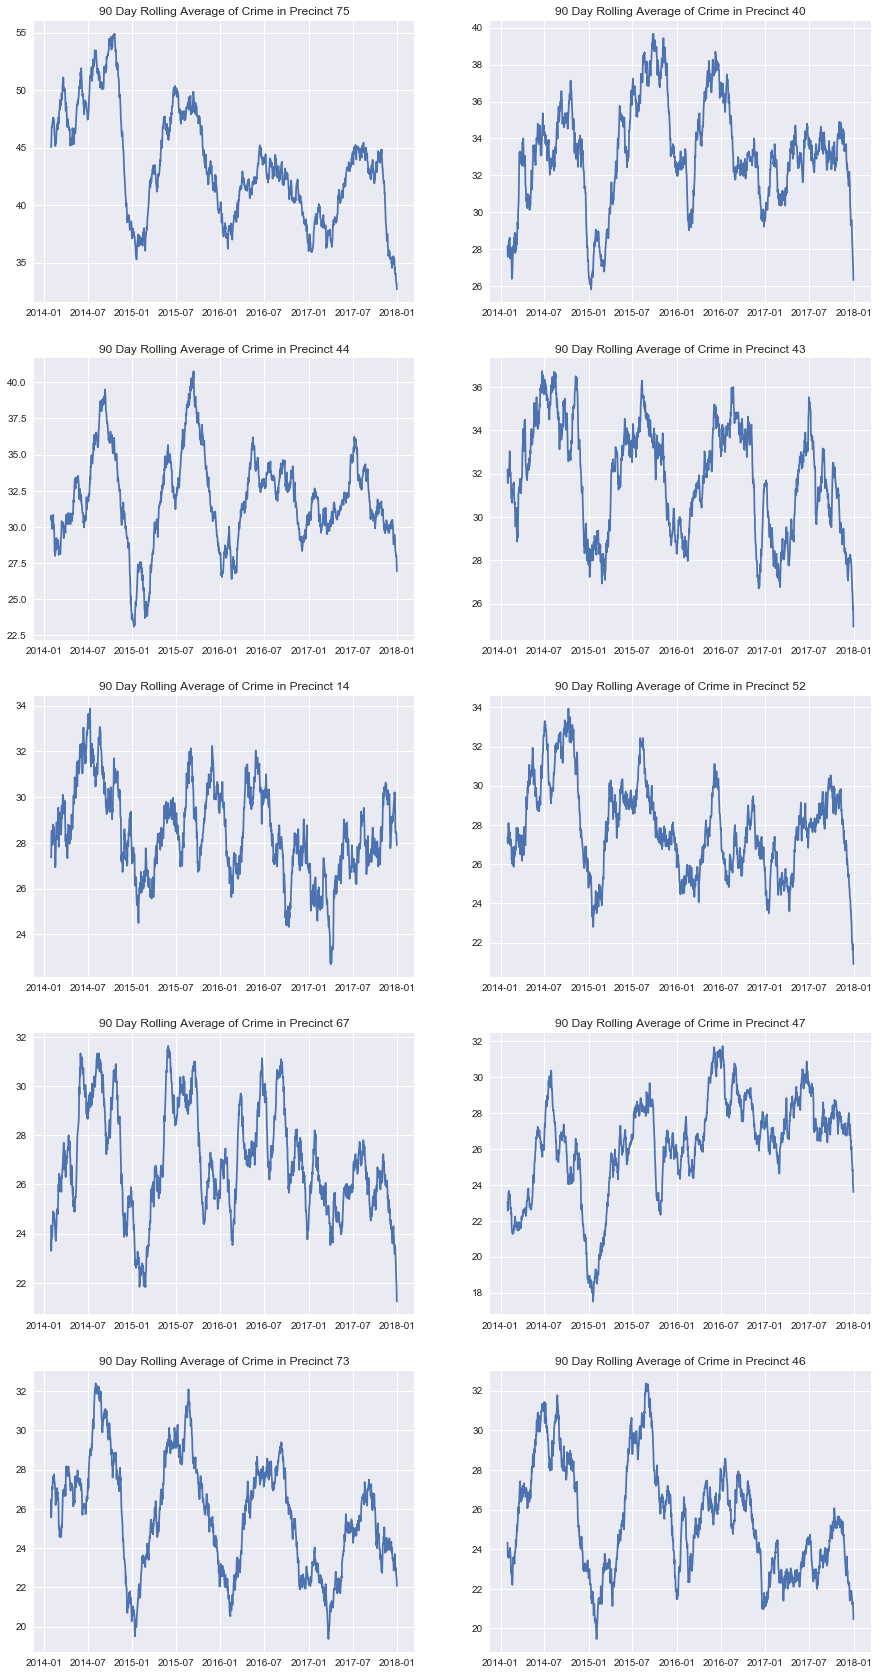

In [48]:
subplot_precincts(precinct_date_count, df.precinct.value_counts().index[:10])

In [49]:
# # plot daily crime for one precinct
# plt.figure(figsize=(10,7))
# precinct = 61
# precinct_1_date_count = df[df.precinct == precinct].groupby('date').count()
# plt.plot(precinct_1_date_count.index, precinct_1_date_count.crime)
# plt.title(f'Precinct {precinct} Daily Crime Count, 2014', fontsize=18);

<BarContainer object of 10 artists>

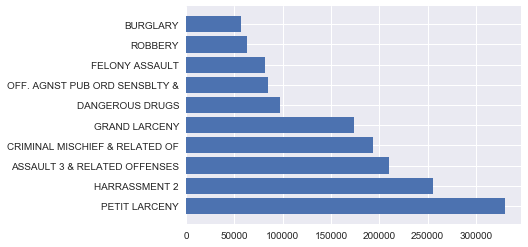

In [50]:
# top 10 crimes by count
top_10_crimes = pd.DataFrame(df.crime.value_counts()[:10])
plt.barh(top_10_crimes.index, top_10_crimes.crime)

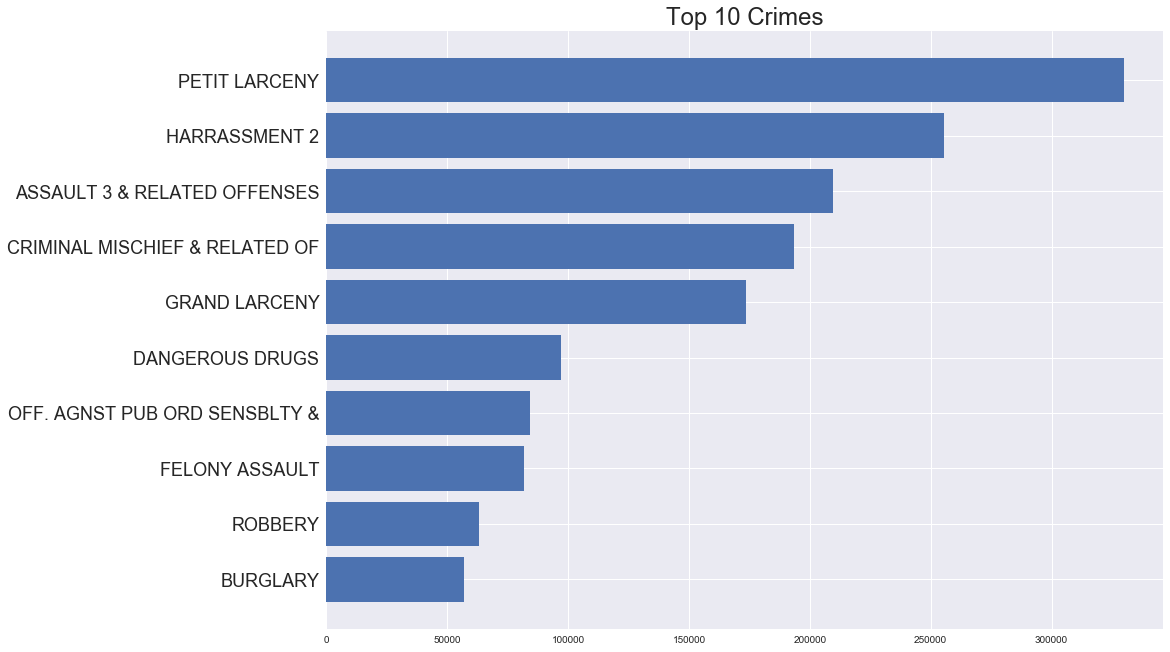

In [51]:
import seaborn as sns
crime_date_count = df.groupby(['crime']).count()
crime_date_count.dropna().shape
p = crime_date_count.nlargest(10, 'precinct').sort_values('precinct')
plt.figure(figsize=(15,11))
plt.barh(p.index, p.precinct)
plt.title('Top 10 Crimes', fontsize=24)
plt.yticks(fontsize=18);

In [52]:
# agg_date_count = df.resample('D', on='cmplnt_fr_dt').agg(['count'])
# agg_date_count.columns = list(map('_'.join, agg_date_count.columns.values))

#agg_date_count.head()

In [53]:
df.head()

,precinct,crime,latitude,longitude,date,day_of_month,month,year,day_of_week,season
complaint_date,,,,,,,,,,
2014-01-01,121.0,CRIMINAL MISCHIEF & RELATED OF,40.624655,-74.148881,2014-01-01,1,1,2014,Wed,1
2014-01-01,46.0,CRIMINAL MISCHIEF & RELATED OF,40.849963,-73.902241,2014-01-01,1,1,2014,Wed,1
2014-01-01,34.0,OFFENSES AGAINST PUBLIC ADMINI,40.858133,-73.931363,2014-01-01,1,1,2014,Wed,1
2014-01-01,10.0,CRIMINAL TRESPASS,40.749855,-74.001416,2014-01-01,1,1,2014,Wed,1
2014-01-01,114.0,ASSAULT 3 & RELATED OFFENSES,40.773916,-73.913423,2014-01-01,1,1,2014,Wed,1


In [54]:
dummies_temp = pd.get_dummies(df, columns=['precinct', 'crime'])

In [55]:
dummies_by_date = dummies_temp.groupby('date').sum()
dummies_by_date.head()

,latitude,longitude,day_of_month,month,year,season,precinct_1.0,precinct_5.0,precinct_6.0,precinct_7.0,...,crime_PROSTITUTION & RELATED OFFENSES,crime_RAPE,crime_ROBBERY,crime_SEX CRIMES,crime_THEFT OF SERVICES,crime_THEFT-FRAUD,crime_UNAUTHORIZED USE OF A VEHICLE,crime_UNDER THE INFLUENCE OF DRUGS,crime_UNLAWFUL POSS. WEAP. ON SCHOOL,crime_VEHICLE AND TRAFFIC LAWS
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,92907.129637,-168622.452792,2281,2281,4593934,2281,21.0,12.0,30.0,26.0,...,0.0,27.0,49.0,96.0,0.0,52.0,12.0,0.0,0.0,17.0
2014-01-02,44721.769089,-81169.447959,2196,1098,2211372,1098,20.0,8.0,12.0,8.0,...,0.0,2.0,45.0,7.0,2.0,9.0,5.0,0.0,0.0,12.0
2014-01-03,39682.919908,-72000.286240,2922,974,1961636,974,14.0,11.0,9.0,7.0,...,2.0,5.0,33.0,7.0,0.0,22.0,2.0,0.0,0.0,3.0
2014-01-04,42730.762087,-77550.892231,4196,1049,2112686,1049,10.0,6.0,8.0,3.0,...,0.0,3.0,29.0,4.0,2.0,8.0,5.0,0.0,0.0,11.0
2014-01-05,41428.333559,-75178.681651,5085,1017,2048238,1017,7.0,17.0,10.0,10.0,...,0.0,3.0,33.0,12.0,0.0,8.0,6.0,0.0,0.0,8.0


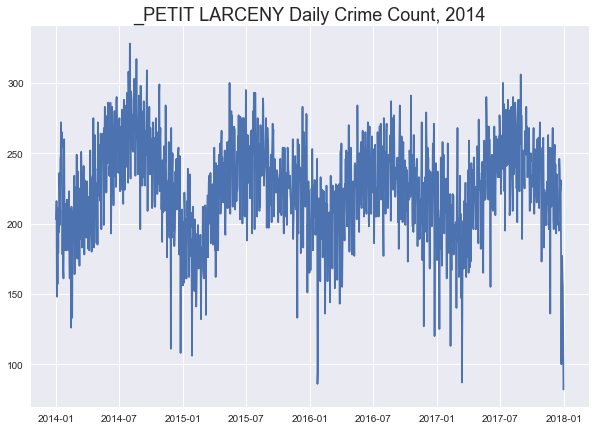

In [56]:
# plot daily incidents
plt.figure(figsize=(10,7))
column = 'crime_' + top_10_crimes.index[0]
column_name = column.replace('crime', '')
plt.plot(dummies_by_date.index, dummies_by_date[column])
plt.title(f'{column_name} Daily Crime Count, 2014', fontsize=18);

In [57]:
def subplot_crime(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,30))  
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].plot(dataframe[column].rolling(90).mean())
        ax[i].set_title(f'Daily Incidence of {column.replace("crime_", "")}, 90 Day Rolling Avg')

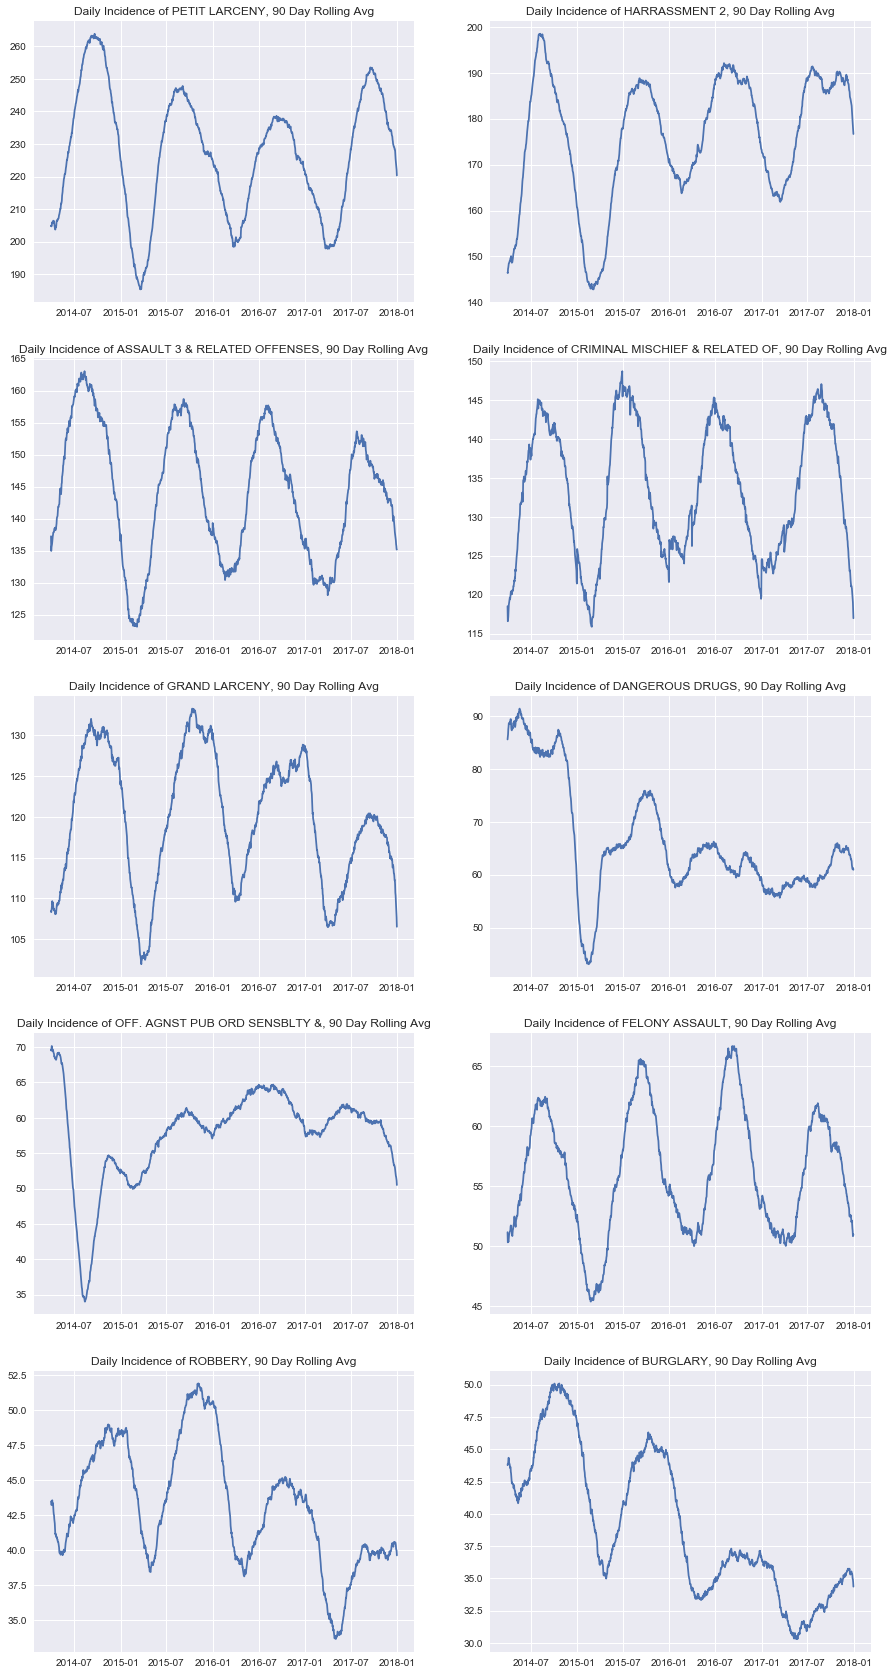

In [58]:
top_10_crimes_columns = 'crime_' + top_10_crimes.index
subplot_crime(dummies_by_date, top_10_crimes_columns)

In [61]:
df.head()

,precinct,crime,latitude,longitude,date,day_of_month,month,year,day_of_week,season
complaint_date,,,,,,,,,,
2014-01-01,121.0,CRIMINAL MISCHIEF & RELATED OF,40.624655,-74.148881,2014-01-01,1,1,2014,Wed,1
2014-01-01,46.0,CRIMINAL MISCHIEF & RELATED OF,40.849963,-73.902241,2014-01-01,1,1,2014,Wed,1
2014-01-01,34.0,OFFENSES AGAINST PUBLIC ADMINI,40.858133,-73.931363,2014-01-01,1,1,2014,Wed,1
2014-01-01,10.0,CRIMINAL TRESPASS,40.749855,-74.001416,2014-01-01,1,1,2014,Wed,1
2014-01-01,114.0,ASSAULT 3 & RELATED OFFENSES,40.773916,-73.913423,2014-01-01,1,1,2014,Wed,1


In [62]:
complaints = df
complaints.index = pd.DatetimeIndex(df.date)
complaints.head()

,precinct,crime,latitude,longitude,date,day_of_month,month,year,day_of_week,season
date,,,,,,,,,,
2014-01-01,121.0,CRIMINAL MISCHIEF & RELATED OF,40.624655,-74.148881,2014-01-01,1,1,2014,Wed,1
2014-01-01,46.0,CRIMINAL MISCHIEF & RELATED OF,40.849963,-73.902241,2014-01-01,1,1,2014,Wed,1
2014-01-01,34.0,OFFENSES AGAINST PUBLIC ADMINI,40.858133,-73.931363,2014-01-01,1,1,2014,Wed,1
2014-01-01,10.0,CRIMINAL TRESPASS,40.749855,-74.001416,2014-01-01,1,1,2014,Wed,1
2014-01-01,114.0,ASSAULT 3 & RELATED OFFENSES,40.773916,-73.913423,2014-01-01,1,1,2014,Wed,1


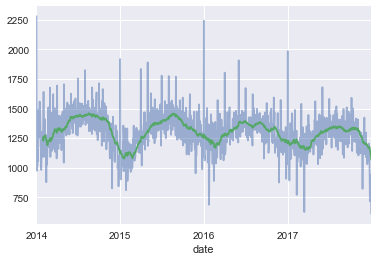

In [63]:
complaints.resample('D').size().plot(alpha=0.5)
complaints.resample('D').size().rolling(30).mean().plot()

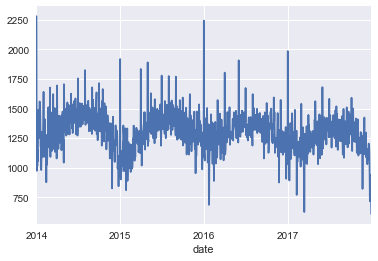

In [64]:
complaints.resample('D').size().plot()

In [65]:
df.head()

,precinct,crime,latitude,longitude,date,day_of_month,month,year,day_of_week,season
date,,,,,,,,,,
2014-01-01,121.0,CRIMINAL MISCHIEF & RELATED OF,40.624655,-74.148881,2014-01-01,1,1,2014,Wed,1
2014-01-01,46.0,CRIMINAL MISCHIEF & RELATED OF,40.849963,-73.902241,2014-01-01,1,1,2014,Wed,1
2014-01-01,34.0,OFFENSES AGAINST PUBLIC ADMINI,40.858133,-73.931363,2014-01-01,1,1,2014,Wed,1
2014-01-01,10.0,CRIMINAL TRESPASS,40.749855,-74.001416,2014-01-01,1,1,2014,Wed,1
2014-01-01,114.0,ASSAULT 3 & RELATED OFFENSES,40.773916,-73.913423,2014-01-01,1,1,2014,Wed,1


In [66]:
four_year_complaint_totals = pd.DataFrame(df.groupby(['precinct']).count()['date'])

In [67]:
four_year_complaint_totals.to_csv('./data/fouryear.csv')

In [68]:
four_year_complaint_totals.head()

,date
precinct,
1.0,23469
5.0,17034
6.0,19598
7.0,16456
9.0,21576


## Create Dataframe with Columns for Each Month

In [69]:
complaint_totals= pd.DataFrame(df.groupby(['precinct', 'month', 'year']).count()['date'])

In [70]:
d = complaint_totals.unstack().unstack()

In [71]:
count_2014 = d.xs(2014, level='year', axis=1)
count_2014.columns = count_2014.columns.get_level_values(1)
count_2014.columns = count_2014.columns.map({i:'2014_'+str(i) for i in count_2014.columns})

In [72]:
temp_merge = four_year_complaint_totals.merge(count_2014, how='left', on='precinct')

In [73]:
count_2015 = d.xs(2015, level='year', axis=1)
count_2015.columns = count_2015.columns.get_level_values(1)
count_2015.columns = count_2015.columns.map({i:'2015_'+str(i) for i in count_2015.columns})

In [74]:
temp_merge = temp_merge.merge(count_2015, how='left', on='precinct')

In [75]:
count_2016 = d.xs(2016, level='year', axis=1)
count_2016.columns = count_2016.columns.get_level_values(1)
count_2016.columns = count_2016.columns.map({i:'2016_'+str(i) for i in count_2016.columns})   

In [76]:
temp_merge = temp_merge.merge(count_2016, how='left', on='precinct')
temp_merge.head()

,date,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,2014_8,2014_9,...,2016_3,2016_4,2016_5,2016_6,2016_7,2016_8,2016_9,2016_10,2016_11,2016_12
precinct,,,,,,,,,,,,,,,,,,,,,
1.0,23469,408,403,434,467,503,512,530,504,509,...,503,526,507,538,507,584,536,570,506,538
5.0,17034,316,302,307,363,380,411,397,397,376,...,367,375,384,399,361,380,374,361,337,314
6.0,19598,385,371,391,408,481,459,471,428,451,...,395,374,404,387,403,432,365,426,336,405
7.0,16456,333,266,324,333,370,337,313,360,327,...,345,398,377,350,400,397,391,383,350,348
9.0,21576,455,370,491,393,503,464,507,478,483,...,453,449,475,508,509,507,482,519,410,477


In [77]:
count_2017 = d.xs(2017, level='year', axis=1)
count_2017.columns = count_2017.columns.get_level_values(1)
count_2017.columns = count_2017.columns.map({i:'2017_'+str(i) for i in count_2017.columns})   

In [78]:
temp_merge = temp_merge.merge(count_2017, how='left', on='precinct')
temp_merge.head()

,date,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,2014_8,2014_9,...,2017_3,2017_4,2017_5,2017_6,2017_7,2017_8,2017_9,2017_10,2017_11,2017_12
precinct,,,,,,,,,,,,,,,,,,,,,
1.0,23469,408,403,434,467,503,512,530,504,509,...,474,434,495,518,524,496,525,589,485,489
5.0,17034,316,302,307,363,380,411,397,397,376,...,310,340,381,357,368,363,356,424,318,336
6.0,19598,385,371,391,408,481,459,471,428,451,...,334,396,426,398,502,502,469,494,390,340
7.0,16456,333,266,324,333,370,337,313,360,327,...,335,363,409,372,381,367,373,344,320,275
9.0,21576,455,370,491,393,503,464,507,478,483,...,379,445,425,452,428,427,405,435,446,385


In [79]:
temp_merge.to_csv('./data/monthly_total_by_precinct.csv')

## Create Dataframe with Columns for Each Season by Year

In [80]:
complaint_totals_season = pd.DataFrame(df.groupby(['precinct', 'year', 'season']).count()['date'])

In [81]:
d = complaint_totals_season.unstack().unstack()
d.head()

date                                                              \
season       1                       2                       3               
year      2014  2015  2016  2017  2014  2015  2016  2017  2014  2015  2016   
precinct                                                                     
1.0       1221  1315  1479  1395  1404  1369  1536  1403  1546  1492  1629   
5.0        926   916   998   981  1050  1055  1126  1031  1205  1098  1140   
6.0       1060  1078  1131  1038  1280  1225  1173  1156  1358  1377  1222   
7.0        854   945   985   936  1027   935  1120  1107  1010  1091  1147   
9.0       1214  1245  1323  1154  1387  1381  1377  1249  1449  1452  1524   

                                        
season             4                    
year      2017  2014  2015  2016  2017  
precinct                                
1.0       1538  1465  1466  1612  1599  
5.0       1088  1091  1159  1072  1098  
6.0       1402  1344  1274  1127  1353  
7.0       1120   955  1063  1124  1037  
9.0       1307  1401  1416  1411  1286

In [82]:
count_2014 = d.xs(2014, level='year', axis=1)
count_2014.columns = count_2014.columns.get_level_values(1)
count_2014.columns = count_2014.columns.map({i:'2014_'+str(i) for i in count_2014.columns})

temp_merge = four_year_complaint_totals.merge(count_2014, how='left', on='precinct')

count_2015 = d.xs(2015, level='year', axis=1)
count_2015.columns = count_2015.columns.get_level_values(1)
count_2015.columns = count_2015.columns.map({i:'2015_'+str(i) for i in count_2015.columns})

temp_merge = temp_merge.merge(count_2015, how='left', on='precinct')

count_2016 = d.xs(2016, level='year', axis=1)
count_2016.columns = count_2016.columns.get_level_values(1)
count_2016.columns = count_2016.columns.map({i:'2016_'+str(i) for i in count_2016.columns})   

temp_merge = temp_merge.merge(count_2016, how='left', on='precinct')
temp_merge.head()

count_2017 = d.xs(2017, level='year', axis=1)
count_2017.columns = count_2017.columns.get_level_values(1)
count_2017.columns = count_2017.columns.map({i:'2017_'+str(i) for i in count_2017.columns})   

temp_merge = temp_merge.merge(count_2017, how='left', on='precinct')
temp_merge.head()

,date,2014_1,2014_2,2014_3,2014_4,2015_1,2015_2,2015_3,2015_4,2016_1,2016_2,2016_3,2016_4,2017_1,2017_2,2017_3,2017_4
precinct,,,,,,,,,,,,,,,,,
1.0,23469,1221,1404,1546,1465,1315,1369,1492,1466,1479,1536,1629,1612,1395,1403,1538,1599
5.0,17034,926,1050,1205,1091,916,1055,1098,1159,998,1126,1140,1072,981,1031,1088,1098
6.0,19598,1060,1280,1358,1344,1078,1225,1377,1274,1131,1173,1222,1127,1038,1156,1402,1353
7.0,16456,854,1027,1010,955,945,935,1091,1063,985,1120,1147,1124,936,1107,1120,1037
9.0,21576,1214,1387,1449,1401,1245,1381,1452,1416,1323,1377,1524,1411,1154,1249,1307,1286


## Create Dataframe with Columns for Each Season, Aggregate

In [83]:
complaint_totals_season_agg = pd.DataFrame(df.groupby(['precinct', 'season']).count()['date'])

In [84]:
d = complaint_totals_season_agg.unstack()
d.columns = d.columns.get_level_values(1)
d.head()

season,1,2,3,4
precinct,,,,
1.0,5410,5712,6205,6142
5.0,3821,4262,4531,4420
6.0,4307,4834,5359,5098
7.0,3720,4189,4368,4179
9.0,4936,5394,5732,5514


In [85]:
d.to_csv('./data/precinct_agg_season.csv')